In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


# Загрузка датасета одежды


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[9 0 0 ... 3 0 5]


In [0]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(train_images.shape)

(60000, 28, 28, 1)


Так как каждый пиксель представляет собой значение в диапозоне $[0, 255]$, то изменим это значение для соответствия диапозону $[0, 1]$

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Настройка модели - модифицированный VGG


In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение


In [0]:
epochs_num = 10
history = model.fit(train_images, train_labels, epochs=epochs_num, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 227s 5ms/sample - loss: 0.4946 - accuracy: 0.8308 - val_loss: 0.2822 - val_accuracy: 0.9009
Epoch 2/10
42000/42000 [==============================] - 228s 5ms/sample - loss: 0.3185 - accuracy: 0.8852 - val_loss: 0.2618 - val_accuracy: 0.9069
Epoch 3/10
42000/42000 [==============================] - 230s 5ms/sample - loss: 0.2880 - accuracy: 0.8960 - val_loss: 0.2504 - val_accuracy: 0.9104
Epoch 4/10
42000/42000 [==============================] - 229s 5ms/sample - loss: 0.2623 - accuracy: 0.9055 - val_loss: 0.2794 - val_accuracy: 0.9133
Epoch 5/10
42000/42000 [==============================] - 228s 5ms/sample - loss: 0.2505 - accuracy: 0.9088 - val_loss: 0.2157 - val_accuracy: 0.9243
Epoch 6/10
42000/42000 [==============================] - 227s 5ms/sample - loss: 0.2277 - accuracy: 0.9166 - val_loss: 0.2287 - val_accuracy: 0.9240
Epoch 7/10
42000/42000 [==========================

# Результаты


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 10s - loss: 0.2130 - accuracy: 0.9247


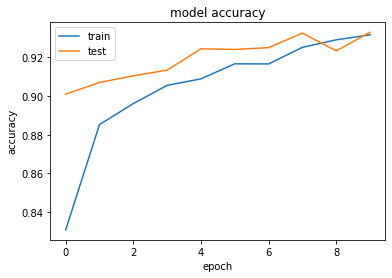

In [0]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()